In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
url = ('/IIT/FYP/Python/data_edit.csv')
names = ['WBC', 'HGB', 'NENO', 'LYMNO', 'MONO', 'EONO', 'BANO', 'HCT', 'MCV', 'PLT', 'Disease']
data = pd.read_csv(url, names=names)
data = data.drop(index=0)

In [65]:
le = LabelEncoder()
le.fit(['CLL', 'CML', 'HCL', 'Leukemia Positive', 'Normal'])

LabelEncoder()

In [66]:
list(le.classes_)

['CLL', 'CML', 'HCL', 'Leukemia Positive', 'Normal']

In [67]:
le.transform(['CLL', 'CML', 'HCL', 'Leukemia Positive', 'Normal']) 

array([0, 1, 2, 3, 4])

In [68]:
data['Disease'] = le.fit_transform(data['Disease'])

In [69]:
data['Disease'].value_counts()

0    337
4    319
2    312
1    311
3    303
Name: Disease, dtype: int64

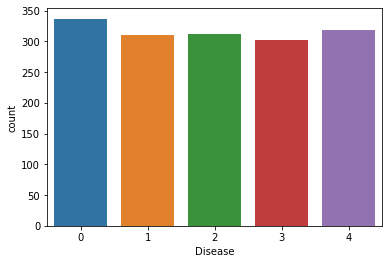

In [70]:
sns.countplot(data['Disease'])

In [71]:
df_x = data.drop('Disease', axis=1)
df_y = data['Disease']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4)

In [72]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [73]:
#decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_rfc = dt.predict(x_test)

In [74]:
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.94      0.92      0.93        74
           1       0.89      0.94      0.91        63
           2       0.83      0.82      0.83        55
           3       0.84      0.84      0.84        64
           4       0.87      0.87      0.87        61

    accuracy                           0.88       317
   macro avg       0.88      0.88      0.88       317
weighted avg       0.88      0.88      0.88       317



In [75]:
dt.score(x_test, y_test)

0.8801261829652997

In [76]:
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
pred_rfc = knn.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.81      0.59      0.69        74
           1       0.78      0.84      0.81        63
           2       0.78      0.82      0.80        55
           3       0.77      0.69      0.73        64
           4       0.72      0.95      0.82        61

    accuracy                           0.77       317
   macro avg       0.77      0.78      0.77       317
weighted avg       0.78      0.77      0.76       317



In [78]:
knn.score(x_test, y_test)

0.7697160883280757

In [79]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pred_rfc = lr.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.83      0.74      0.79        74
           1       0.87      0.73      0.79        63
           2       0.74      0.84      0.79        55
           3       0.65      0.61      0.63        64
           4       0.67      0.84      0.74        61

    accuracy                           0.75       317
   macro avg       0.75      0.75      0.75       317
weighted avg       0.76      0.75      0.75       317



In [81]:
lr.score(x_test, y_test)

0.7476340694006309

In [82]:
#Support vector machine
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
pred_rfc = svm.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.89      0.68      0.77        74
           1       0.84      0.89      0.86        63
           2       0.73      0.84      0.78        55
           3       0.82      0.72      0.77        64
           4       0.76      0.93      0.84        61

    accuracy                           0.80       317
   macro avg       0.81      0.81      0.80       317
weighted avg       0.81      0.80      0.80       317



In [84]:
svm.score(x_test, y_test)

0.804416403785489

In [85]:
# naive bayas
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
pred_rfc = nb.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.77      0.65      0.71        74
           1       0.78      0.78      0.78        63
           2       0.75      0.85      0.80        55
           3       0.74      0.50      0.60        64
           4       0.63      0.89      0.73        61

    accuracy                           0.73       317
   macro avg       0.73      0.73      0.72       317
weighted avg       0.74      0.73      0.72       317



In [87]:
nb.score(x_test, y_test)

0.7255520504731862

In [88]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.6, max_features= 1.0, n_estimators= 20)
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [89]:
pred_rfc = bg.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.96      0.91      0.93        74
           1       0.91      0.92      0.91        63
           2       0.81      0.84      0.82        55
           3       0.86      0.86      0.86        64
           4       0.90      0.92      0.91        61

    accuracy                           0.89       317
   macro avg       0.89      0.89      0.89       317
weighted avg       0.89      0.89      0.89       317



In [90]:
bg.score(x_test, y_test)

0.889589905362776

In [91]:
bg = BaggingClassifier(GaussianNB(), max_samples= 0.6, max_features= 1.0, n_estimators= 20)
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.6, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [92]:
pred_rfc = bg.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.75      0.64      0.69        74
           1       0.80      0.76      0.78        63
           2       0.76      0.85      0.80        55
           3       0.73      0.42      0.53        64
           4       0.57      0.89      0.69        61

    accuracy                           0.70       317
   macro avg       0.72      0.71      0.70       317
weighted avg       0.72      0.70      0.70       317



In [93]:
bg.score(x_test, y_test)

0.7034700315457413

In [94]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators= 20, learning_rate= 1)
adb.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [95]:
pred_rfc = adb.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.96      0.91      0.93        74
           1       0.89      0.92      0.91        63
           2       0.81      0.85      0.83        55
           3       0.86      0.86      0.86        64
           4       0.88      0.87      0.88        61

    accuracy                           0.88       317
   macro avg       0.88      0.88      0.88       317
weighted avg       0.88      0.88      0.88       317



In [96]:
adb.score(x_test, y_test)

0.8832807570977917

In [97]:
adb = AdaBoostClassifier(SVC(probability=True, kernel='linear'), n_estimators= 10, learning_rate= 1)
adb.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=True,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=1, n_estimators=10, random_state=None)

In [98]:
pred_rfc = adb.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [99]:
adb.score(x_test, y_test)

0.555205047318612

In [100]:
adb = AdaBoostClassifier(LogisticRegression(), n_estimators= 10, learning_rate= 1)
adb.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1, n_estimators=10, random_state=None)

In [101]:
red_rfc = adb.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [102]:
adb.score(x_test, y_test)

0.6056782334384858

In [103]:
sc = StackingClassifier(estimators= [('nb', nb), ('lr', lr)])
sc.fit(x_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('nb',
                                GaussianNB(priors=None, var_smoothing=1e-09)),
                               ('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False))],
                   fin

In [104]:
red_rfc = sc.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [105]:
sc.score(x_test, y_test)

0.7854889589905363

In [106]:
sc1 = StackingClassifier(estimators= [('nb', nb), ('lr', lr), ('svm', svm), ('dt', dt)])
sc1.fit(x_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('nb',
                                GaussianNB(priors=None, var_smoothing=1e-09)),
                               ('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                       

In [107]:
red_rfc = sc1.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [108]:
sc1.score(x_test, y_test)

0.8738170347003155

In [109]:
evc = VotingClassifier(estimators= [('svm', svm), ('knn', knn), ('dt', dt)], voting='hard')
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_param...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
   

In [110]:
red_rfc = evc.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [111]:
evc.score(x_test, y_test)

0.8201892744479495

In [112]:
evc = VotingClassifier(estimators= [('svm', svm), ('knn', knn), ('dt', dt)], voting='hard')
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_param...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
   

In [113]:
red_rfc = evc.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [114]:
evc.score(x_test, y_test)

0.8170347003154574

In [115]:
evc = VotingClassifier(estimators= [('nb', nb), ('lr', lr), ('svm', svm), ('dt', dt)], voting='hard')
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=1.0, break_ties...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                 

In [116]:
red_rfc = evc.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [117]:
evc.score(x_test, y_test)

0.8264984227129337

In [118]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
red_rfc = rfc.predict(x_test)
print(classification_report(y_test,pred_rfc))

precision    recall  f1-score   support

           0       0.49      0.66      0.56        74
           1       0.56      0.71      0.63        63
           2       0.87      0.62      0.72        55
           3       0.33      0.05      0.08        64
           4       0.52      0.74      0.61        61

    accuracy                           0.56       317
   macro avg       0.55      0.56      0.52       317
weighted avg       0.54      0.56      0.51       317



In [120]:
rfc.score(x_test, y_test)

0.886435331230284